In [41]:
import glob
import csv
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [42]:
def take_station_info(files_path):

    rows_list = []

    for file in glob.glob(files_path):
        with open(file, newline='', encoding='latin1') as csvfile:
            csv_reader = csv.reader(csvfile, delimiter=';')

            rows = [next(csv_reader) for _ in range(8)]
            processed_rows = [row[1] for row in rows]

            new_row = {
                'csv_path': file,
                'regiao': processed_rows[0],
                'uf': processed_rows[1],
                'nome': processed_rows[2],
                'codigo': processed_rows[3],
                'latitude': processed_rows[4].replace(',', '.'),
                'longitude': processed_rows[5].replace(',', '.'),
                'altitude': processed_rows[6].replace(',', '.'),
                'data_inicio': processed_rows[7]
            }

            rows_list.append(new_row)

    df_stations = pd.DataFrame(rows_list, columns=["csv_path", "regiao", "uf", "nome", "codigo", "latitude", "longitude", "altitude", "data_inicio"])

    return df_stations

In [43]:
def take_station_data(df_stations_info):

    data_stations = pd.DataFrame()

    index_stations = np.array(df_stations_info.index)

    for i in index_stations:
        file_csv = df_stations_info.loc[i, 'csv_path']

        try:
            df_variables = pd.read_csv(file_csv, skiprows=8, delimiter=";", decimal=",", encoding='latin1') # type: ignore
            df_variables = df_variables[['Data',
                                        'Hora UTC',
                                        'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
                                        'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
                                        'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
                                        'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
                                        'RADIACAO GLOBAL (Kj/m²)',
                                        'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
                                        'TEMPERATURA DO PONTO DE ORVALHO (°C)',
                                        'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
                                        'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
                                        'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
                                        'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
                                        'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
                                        'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
                                        'UMIDADE RELATIVA DO AR, HORARIA (%)',
                                        'VENTO, DIREÇÃO HORARIA (gr) (° (gr))',
                                        'VENTO, RAJADA MAXIMA (m/s)',
                                        'VENTO, VELOCIDADE HORARIA (m/s)']]
            df_variables['codigo'] = df_stations_info.loc[i, 'codigo']
            df_variables['latitude'] = df_stations_info.loc[i, 'latitude']
            df_variables['longitude'] = df_stations_info.loc[i, 'longitude']
            df_variables.dropna(inplace=True)

            data_stations = pd.concat([data_stations, df_variables])
        except UnicodeDecodeError:
            print(f"Erro de codificação ao ler o arquivo {file_csv}. Ignorando esse arquivo.")
            continue
        except pd.errors.ParserError:
            print(f"Erro ao processar o arquivo {file_csv}. Ignorando esse arquivo.")
            continue

    return data_stations

In [44]:
df_stations_2021 = take_station_info(r"path\*.CSV")
df_stations_2022 = take_station_info(r"path\*.CSV")
df_stations_2023 = take_station_info(r"path\*.CSV")

In [45]:
(df_stations_2023.drop(columns=['csv_path'])).to_csv(r'path', index=False)

In [46]:
display(df_stations_2023.drop(columns=['csv_path']))

,regiao,uf,nome,codigo,latitude,longitude,altitude,data_inicio
0,CO,DF,BRASILIA,A001,-15.78944444,-47.92583332,1160.96,07/05/00
1,CO,DF,BRAZLANDIA,A042,-15.59972221,-48.1311111,1143,19/07/17
2,CO,DF,AGUAS EMENDADAS,A045,-15.596491,-47.625801,1030.36,03/10/08
3,CO,DF,GAMA (PONTE ALTA),A046,-15.93527777,-48.13749999,990,01/10/14
4,CO,DF,PARANOA (COOPA-DF),A047,-16.012222,-47.557417,1043,07/02/17
...,...,...,...,...,...,...,...,...
562,S,SC,ARARANGUA,A867,-28.931353,-49.49792,2,28/09/08
563,S,SC,ITAJAI,A868,-26.95083333,-48.76194444,9.76,24/06/10
564,S,SC,RANCHO QUEIMADO,A870,-27.6786111,-49.04194444,881,31/05/16
565,S,SC,CHAPECO,A895,-27.0853111,-52.6357111,679,19/02/19


In [47]:
data_stations_2021 = take_station_data(df_stations_2021)
data_stations_2022 = take_station_data(df_stations_2022)
data_stations_2023 = take_station_data(df_stations_2023)

In [48]:
(pd.concat([data_stations_2021, data_stations_2022, data_stations_2023])).to_csv(r'path', index=False)

In [49]:
display(data_stations_2023)

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),...,TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",codigo,latitude,longitude
9,2023/01/01,0900 UTC,0.0,887.1,887.1,886.5,2.5,18.1,16.9,18.3,...,16.8,93.0,92.0,93.0,121.0,3.5,1.6,A001,-15.78944444,-47.92583332
10,2023/01/01,1000 UTC,0.0,887.9,887.9,887.1,253.8,19.0,17.6,19.0,...,16.8,93.0,91.0,91.0,92.0,3.8,2.0,A001,-15.78944444,-47.92583332
11,2023/01/01,1100 UTC,0.2,888.4,888.4,887.9,510.4,19.4,17.5,19.6,...,17.4,91.0,89.0,89.0,81.0,4.7,2.3,A001,-15.78944444,-47.92583332
12,2023/01/01,1200 UTC,0.0,888.6,888.6,888.4,1483.0,21.0,18.0,21.0,...,17.5,90.0,83.0,83.0,56.0,5.5,3.0,A001,-15.78944444,-47.92583332
13,2023/01/01,1300 UTC,0.0,888.7,888.8,888.6,2165.4,22.5,17.9,22.9,...,17.8,84.0,74.0,76.0,89.0,6.0,3.3,A001,-15.78944444,-47.92583332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023/12/31,1900 UTC,0.0,903.4,904.3,903.4,2834.4,26.0,11.4,26.8,...,10.9,46.0,38.0,40.0,276.0,6.3,1.9,A898,-27.3886111,-51.21583333
8756,2023/12/31,2000 UTC,0.0,902.9,903.4,902.9,1088.7,24.6,12.6,26.0,...,11.0,48.0,40.0,47.0,240.0,4.3,1.4,A898,-27.3886111,-51.21583333
8757,2023/12/31,2100 UTC,0.0,902.5,902.9,902.4,789.9,23.9,12.9,24.7,...,12.5,52.0,47.0,50.0,185.0,6.6,4.6,A898,-27.3886111,-51.21583333
8758,2023/12/31,2200 UTC,0.0,902.4,902.5,902.4,397.9,22.9,13.3,24.0,...,12.7,55.0,50.0,55.0,178.0,6.8,3.1,A898,-27.3886111,-51.21583333


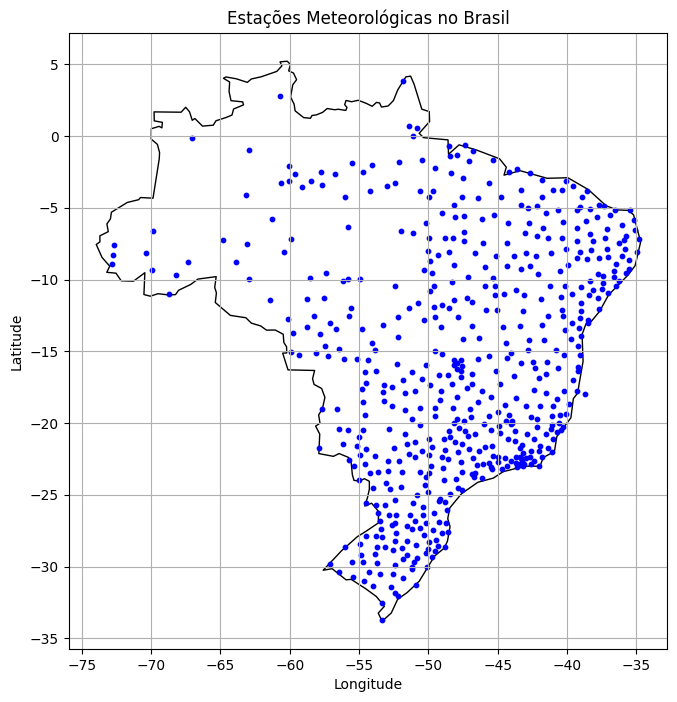

In [50]:
brazil = gpd.read_file(r"data\maps\ne_110m_admin_0_countries.shp")
brazil = brazil[brazil['NAME'] == 'Brazil']

geometry = [Point(xy) for xy in zip(df_stations_2023['longitude'], df_stations_2023['latitude'])]
geo_df = gpd.GeoDataFrame(df_stations_2023, geometry=geometry, crs="EPSG:4326")

plt.figure(figsize=(8, 8))
brazil.plot(ax=plt.gca(), color='white', edgecolor='black')
geo_df.plot(ax=plt.gca(), marker='o', color='blue', markersize=10)

plt.title('Estações Meteorológicas no Brasil')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.show()


In [51]:
df_data_stations = (pd.concat([data_stations_2021, data_stations_2022, data_stations_2023]))

In [52]:
df_data_stations['Hora'] = df_data_stations['Hora UTC'].str.replace(' UTC', '')
df_data_stations['Hora'] = df_data_stations['Hora'].str.zfill(4)

df_data_stations['Data_Hora'] = pd.to_datetime(df_data_stations['Data'] + ' ' + df_data_stations['Hora'].str[:2] + ':' + df_data_stations['Hora'].str[2:] + ':00', 
                                 format='%Y/%m/%d %H:%M:%S')

# 👀 Exibindo o DataFrame resultante
display(df_data_stations)


,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),...,UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",codigo,latitude,longitude,Hora,Data_Hora
10,2021/01/01,1000 UTC,0.0,887.9,887.9,887.3,298.2,20.2,17.1,20.2,...,82.0,83.0,356.0,2.3,0.8,A001,-15.78944444,-47.92583332,1000,2021-01-01 10:00:00
11,2021/01/01,1100 UTC,0.0,888.2,888.2,887.8,1203.7,23.2,17.2,23.4,...,67.0,69.0,166.0,4.3,2.3,A001,-15.78944444,-47.92583332,1100,2021-01-01 11:00:00
12,2021/01/01,1200 UTC,0.0,888.6,888.6,888.2,1664.9,24.9,18.0,24.9,...,65.0,65.0,164.0,5.0,2.7,A001,-15.78944444,-47.92583332,1200,2021-01-01 12:00:00
13,2021/01/01,1300 UTC,0.0,888.7,888.7,888.6,2851.7,25.9,15.3,26.3,...,50.0,52.0,150.0,6.3,2.2,A001,-15.78944444,-47.92583332,1300,2021-01-01 13:00:00
14,2021/01/01,1400 UTC,0.0,888.5,888.7,888.4,3115.7,27.0,15.9,27.0,...,50.0,50.0,114.0,5.7,3.2,A001,-15.78944444,-47.92583332,1400,2021-01-01 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023/12/31,1900 UTC,0.0,903.4,904.3,903.4,2834.4,26.0,11.4,26.8,...,38.0,40.0,276.0,6.3,1.9,A898,-27.3886111,-51.21583333,1900,2023-12-31 19:00:00
8756,2023/12/31,2000 UTC,0.0,902.9,903.4,902.9,1088.7,24.6,12.6,26.0,...,40.0,47.0,240.0,4.3,1.4,A898,-27.3886111,-51.21583333,2000,2023-12-31 20:00:00
8757,2023/12/31,2100 UTC,0.0,902.5,902.9,902.4,789.9,23.9,12.9,24.7,...,47.0,50.0,185.0,6.6,4.6,A898,-27.3886111,-51.21583333,2100,2023-12-31 21:00:00
8758,2023/12/31,2200 UTC,0.0,902.4,902.5,902.4,397.9,22.9,13.3,24.0,...,50.0,55.0,178.0,6.8,3.1,A898,-27.3886111,-51.21583333,2200,2023-12-31 22:00:00


In [53]:
df_data_stations = pd.DataFrame({'Data_Hora': df_data_stations['Data_Hora'],
                                 'Latitude': df_data_stations['latitude'],
                                 'Longitude': df_data_stations['longitude'],
                                 'Precipitacao': df_data_stations['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'],
                                 'Radiacao_Solar': df_data_stations['RADIACAO GLOBAL (Kj/m²)'],
                                 'Temperatura': df_data_stations['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'],
                                 'Umidade': df_data_stations['UMIDADE RELATIVA DO AR, HORARIA (%)']})

In [54]:
display(df_data_stations)

,Data_Hora,Latitude,Longitude,Precipitacao,Radiacao_Solar,Temperatura,Umidade
10,2021-01-01 10:00:00,-15.78944444,-47.92583332,0.0,298.2,20.2,83.0
11,2021-01-01 11:00:00,-15.78944444,-47.92583332,0.0,1203.7,23.2,69.0
12,2021-01-01 12:00:00,-15.78944444,-47.92583332,0.0,1664.9,24.9,65.0
13,2021-01-01 13:00:00,-15.78944444,-47.92583332,0.0,2851.7,25.9,52.0
14,2021-01-01 14:00:00,-15.78944444,-47.92583332,0.0,3115.7,27.0,50.0
...,...,...,...,...,...,...,...
8755,2023-12-31 19:00:00,-27.3886111,-51.21583333,0.0,2834.4,26.0,40.0
8756,2023-12-31 20:00:00,-27.3886111,-51.21583333,0.0,1088.7,24.6,47.0
8757,2023-12-31 21:00:00,-27.3886111,-51.21583333,0.0,789.9,23.9,50.0
8758,2023-12-31 22:00:00,-27.3886111,-51.21583333,0.0,397.9,22.9,55.0


In [55]:
(df_data_stations).to_csv(r'path', index=False)